In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [155]:
url_data = "C:/Users/asus/Desktop/house-price-prediction-6/train.csv"
dataset = pd.read_csv(url_data)
test_url = "C:/Users/asus/Desktop/house-price-prediction-6/test.csv"
test = pd.read_csv(test_url)

## Features Description

#### Null Features:

In [5]:
# Null Categorical Columns:

# Alley                                     : 56,   0.94 is null    - Fill with 'NO' & encoding (drop first)    ['Pave', 'Grvl']
# MasVnrType                                : 392,  0.58 is null    - Fill with 'NO' & encoding (drop first)    ['BrkFace', 'Stone', 'BrkCmn']
# BsmtQual,BsmtCond,BsmtExposure,           : 908,  0.03 is null    - Fill with 'NO' & label encoding           ['Gd', 'Ex', 'TA', 'Fa'], ['TA', 'Gd', 'Fa', 'Po'],
#                   BsmtFinType1&2                                                                           
# FireplaceQu                               : 498,  0.47 is null    - Fill with 'NO' & label encoding           ['TA', 'Gd', 'Fa', 'Po', 'Ex']
# GarageType                                : 884,  0.05 is null    - Fill with 'NO' & encoding (drop first)    ['Attchd', 'BuiltIn', 'Detchd', 'Basment', 'CarPort', '2Types']
# GarageFinish,GarageQual,GarageCond        : 884,  0.05 is null    - Fill with 'NO' & label encoding           ['Fin', 'Unf', 'RFn'], ['TA', 'Fa', 'Ex', 'Gd'], ['TA', 'Ex', 'Fa', 'Gd', 'Po']
# PoolQC                                    : 3,    0.99 is null    - Drop, Fill     & hot(wood&privacy) & label encoding ['Gd', 'Ex']
# Fence                                     : 197,  0.8  is null    - Fill with 'NO' & label encoding           ['MnPrv', 'GdWo', 'GdPrv', 'MnWw']
# MiscFeature                               : 36,   0.96 is null    - Fill with 'NO' & encoding (drop first)    ['Shed', 'Gar2', 'Othr']

# Null Numerical Columns:

# LotFrontage                               : 771,  0.17 is null    - Fill with the median/0
# MasVnrArea                                : 928,  0.006 is null   - Fill with 0
# GarageYrBlt                               : 884,  0.05 is null    - Fill with?

#### Categorical Data

In [6]:
# Categorical Data Description

# MSZoning          : ['RL', 'FV', 'RM', 'RH', 'C (all)']           - merge (R) & encoding
# street            : ['Pave', 'Grvl']                              - encoding
# LotShape          : ['Reg', 'IR1', 'IR2', 'IR3']                  - label encoding
# LandContour       : ['Lvl', 'Bnk', 'HLS', 'Low']                  - label encoding
# Utilities         : ['AllPub']                                    - drop
# LotConfig         : ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'] - encoding
# LandSlope         : ['Gtl', 'Sev', 'Mod']                         - label encoding - the same as LandContour
# Neighborhood      : ['CollgCr', 'NWAmes', 'NridgHt', ..]          - encoding
# Condition1&2      : ['Norm', 'Feedr', 'RRNe', 'PosN', ..]         - encoding
# BldgType          : ['1Fam', 'Twnhs', 'TwnhsE', 'Duplex', ..]     - encoding
# HouseStyle        : ['Pave', 'Grvl']                              - merge? & encoding
# RoofStyle         : ['Gable', 'Hip', 'Gambrel', 'Flat', ..]       - encoding
# RoofMatl          : ['CompShg', 'Tar&Grv', 'Membran', ..]         - CompShg & others, encoding
# Exterior1st&2nd   : ['VinylSd', 'HdBoard', 'MetalSd', ..]         - merge? & encoding?
# ExterQual         : ['Gd', 'TA', 'Ex', 'Fa']                      - label encoding
# ExterCond         : ['TA', 'Gd', 'Fa', 'Po', 'Ex']                - label encoding
# Foundation        : ['PConc', 'CBlock', 'Slab', ..]               - encoding
# Heating           : ['GasA', 'GasW', 'Wall', ..]                  - merge into GasA and others & encoding
# HeatingQC         : ['Ex', 'TA', 'Gd', 'Fa', 'Po']                - label encoding
# CentralAir        : ['Y', 'N']                                    - label encoding
# Electrical        : ['SBrkr', 'FuseA', 'FuseF', nan, ']           - drop na(1), Fill with 'NO', merge? & encoding
# KitchenQual       : ['Gd', 'TA', 'Ex', 'Fa']                      - label encoding
# Functional        : ['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', ..]    - merege & label encoding
# PavedDrive        : ['Y', 'N', 'P']                               - label encoding
# SaleType          : ['WD', 'New', 'Con', ..]                      - merge? & encoding
# SaleCondition     : ['Normal', 'Partial', 'Abnorml', ..]          - label? encoding

#### Numerical Data

In [7]:
# Numerical Data Description

# MSSubClass        : [20,125] [o>125]                              - outliers?
# LotArea           : [1300,20000] [o>20000]                        
# OverallQual       : [1,10]
# OverallCond       : [1,9]
# YearBuilt         : [1872, 2010]
# YearRemodAdd      : [1950, 2010]
# BsmtFinSF1        : [0, 1850] [o>1850]
# BsmtFinSF2        : [0] [o>=30]                                   - outliers?
# BsmtUnfSF         : [0, 2046]                                     - label? encoding
# TotalBsmtSF       : [0, 3206]
# 1stFlrSF          : [334, 3228]
# 2ndFlrSF          : [167, 2065] [100]                            - zeros count?
# LowQualFinSF      : [0, 360, 371, 514, 420, 120, 205,  53, 572,  80, 392, 528, 232, 513, 481]
# GrLivArea         : [334, 4676]
# BsmtFullBath      : [0, 1, 2]
# BsmtHalfBath      : [0, 1, 2]
# FullBath          : [2, 3, 1, 0]
# HalfBath          : [0, 1, 2]                          
# BedroomAbvGr      : [3, 4, 2, 1, 5, 0, 6]
# KitchenAbvGr      : [1, 2, 0, 3]
# TotRmsAbvGrd      : [ 7,  6, 11,  8,  5,  4,  9, 10,  3,  2, 12]
# Fireplaces        : [0, 1, 2, 3]
# GarageCars        : [2, 3, 1, 0, 4]
# GarageArea        : [0, 1390]
# WoodDeckSF        : [0, 440] [o>440]                              - outliers?
# OpenPorchSF       : [0, 200] [o>200]
# EnclosedPorch     : [19, 301] [0] [552]                        
# 3SsnPorch         : [238, 144, 168, 130,  96, 304, 216, 407, 508, 153, 245, 320] [0]
# ScreenPorch       : [53, 480] [0]
# PoolArea          : [0, 738, 555, 512]
# MiscVal           : [350, 15500] [0]
# MoSold            : [1,  12]
# YrSold            : [2006, 2010]
# SalePrice         : [34900, 755000]

## EDA

In [156]:
df = dataset.copy()

In [158]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,142,20,RL,78.0,11645,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,260000
1,365,60,RL,NaN,18800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,190000
2,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
3,976,160,FV,NaN,2651,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,165000
4,1158,120,RL,34.0,5001,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,230000


In [159]:
cat_feat = []
nue_feat = []
col_types = []

In [160]:
for col in df.columns:
    col_types.append(df[col].dtype)

In [161]:
pd.Series(col_types).unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [162]:
for col in df.columns:
    if 'object' in str(df[col].dtype):
        cat_feat.append(col)
    else: nue_feat.append(col)

In [163]:
cat_feat = df[cat_feat]
nue_feat = df[nue_feat]

In [164]:
cat_feat.shape, nue_feat.shape

((934, 43), (934, 38))

### Categorical Features Analysis

In [17]:
# Null Columns:

# Alley                                     : 56,   0.94 is null    - Fill with 'NO' & encoding (drop first)    ['Pave', 'Grvl']
# MasVnrType                                : 392,  0.58 is null    - Fill with 'NO' & encoding (drop first)    ['BrkFace', 'Stone', 'BrkCmn']
# BsmtQual,BsmtCond,BsmtExposure,           : 908,  0.03 is null    - Fill with 'NO' & label encoding           ['Gd', 'Ex', 'TA', 'Fa'], ['TA', 'Gd', 'Fa', 'Po'],
#                   BsmtFinType1&2                                                                           
# FireplaceQu                               : 498,  0.47 is null    - Fill with 'NO' & label encoding           ['TA', 'Gd', 'Fa', 'Po', 'Ex']
# GarageType                                : 884,  0.05 is null    - Fill with 'NO' & encoding (drop first)    ['Attchd', 'BuiltIn', 'Detchd', 'Basment', 'CarPort', '2Types']
# GarageFinish,GarageQual,GarageCond        : 884,  0.05 is null    - Fill with 'NO' & label encoding           ['Fin', 'Unf', 'RFn'], ['TA', 'Fa', 'Ex', 'Gd'], ['TA', 'Ex', 'Fa', 'Gd', 'Po']
# PoolQC                                    : 3,    0.99 is null    - Drop, Fill     & hot(wood&privacy) & label encoding ['Gd', 'Ex']
# Fence                                     : 197,  0.8  is null    - Fill with 'NO' & label encoding           ['MnPrv', 'GdWo', 'GdPrv', 'MnWw']
# MiscFeature                               : 36,   0.96 is null    - Fill with 'NO' & encoding (drop first)    ['Shed', 'Gar2', 'Othr']

In [165]:
cat_feat['MasVnrType'].unique()

array([nan, 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'],
      dtype='object')


<Axes: >

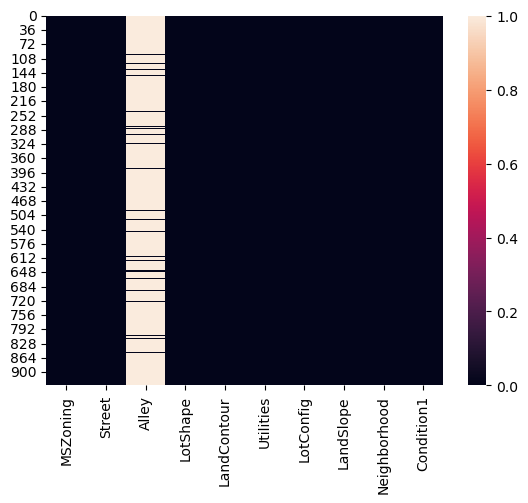

In [166]:
print(cat_feat.iloc[:,:10].columns)
sns.heatmap(cat_feat.iloc[:,:10].isnull())

In [20]:
# MSZoning          : ['RL', 'FV', 'RM', 'RH', 'C (all)']           - merge (R) & encoding
# street            : ['Pave', 'Grvl']                              - encoding
# LotShape          : ['Reg', 'IR1', 'IR2', 'IR3']                  - label encoding
# LandContour       : ['Lvl', 'Bnk', 'HLS', 'Low']                  - label encoding
# Utilities         : ['AllPub']                                    - drop
# LotConfig         : ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'] - encoding
# LandSlope         : ['Gtl', 'Sev', 'Mod']                         - label encoding - the same as LandContour
# Neighborhood      : ['CollgCr', 'NWAmes', 'NridgHt', ..]          - encoding
# Condition1&2      : ['Norm', 'Feedr', 'RRNe', 'PosN', ..]         - encoding

<Axes: xlabel='MSZoning', ylabel='Count'>

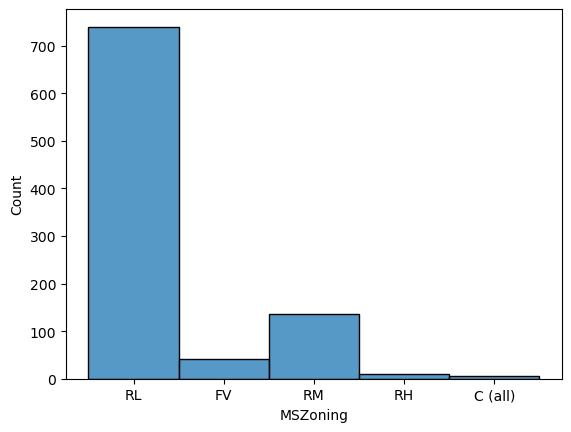

In [167]:
sns.histplot(cat_feat['MSZoning'])

In [168]:
pd.DataFrame([cat_feat['Condition1'].value_counts(), cat_feat['Condition2'].value_counts()], index=['Condition1', 'Condition2'])

,Norm,Feedr,Artery,RRAn,PosN,RRAe,PosA,RRNn,RRNe
Condition1,811.0,48.0,30.0,15.0,13.0,7.0,4.0,4.0,2.0
Condition2,925.0,4.0,1.0,NaN,2.0,1.0,NaN,1.0,NaN


In [169]:
print('Value counts in Alley is', cat_feat['Alley'].count(), '\nhe null percentage is', sum(cat_feat['Alley'].isnull())/len(cat_feat))

Value counts in Alley is 56 
he null percentage is 0.9400428265524625


Index(['Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond'],
      dtype='object')


<Axes: >

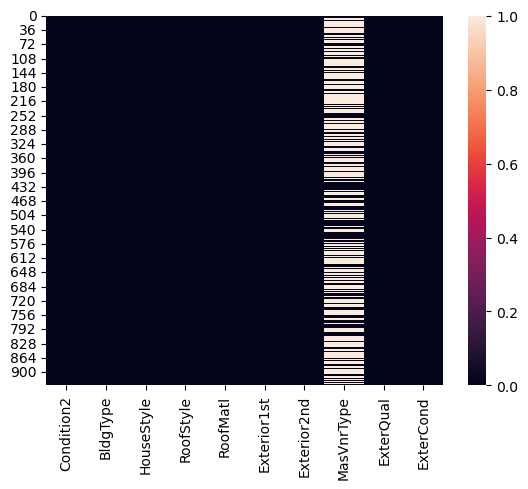

In [170]:
print(cat_feat.iloc[:,10:20].columns)
sns.heatmap(cat_feat.iloc[:,10:20].isnull())

In [25]:
# BldgType          : ['1Fam', 'Twnhs', 'TwnhsE', 'Duplex', ..]     - encoding
# HouseStyle        : ['Pave', 'Grvl']                              - merge? & encoding
# RoofStyle         : ['Gable', 'Hip', 'Gambrel', 'Flat', ..]       - encoding
# RoofMatl          : ['CompShg', 'Tar&Grv', 'Membran', ..]         - CompShg & others, encoding
# Exterior1st&2nd   : ['VinylSd', 'HdBoard', 'MetalSd', ..]         - merge? & encoding?
# ExterQual         : ['Gd', 'TA', 'Ex', 'Fa']                      - label encoding
# ExterCond         : ['TA', 'Gd', 'Fa', 'Po', 'Ex']                - label encodign

<Axes: xlabel='Exterior1st', ylabel='Count'>

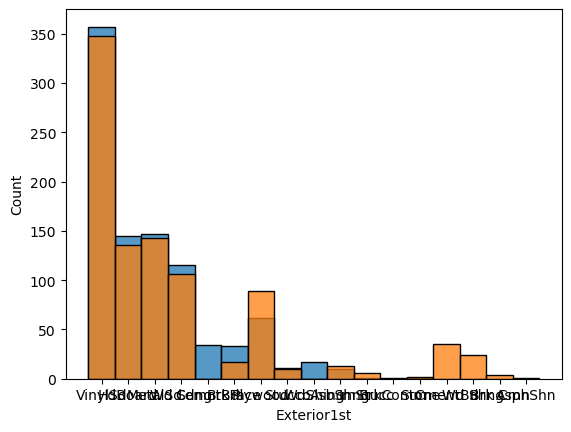

In [171]:
sns.histplot(cat_feat['Exterior1st'])
sns.histplot(cat_feat['Exterior2nd'])

In [172]:
pd.DataFrame([cat_feat['Exterior1st'].value_counts(), cat_feat['Exterior2nd'].value_counts()], index=['Exterior1st', 'Exterior2nd'])

,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,Stucco,AsbShng,ImStucc,BrkComm,Stone,CmentBd,Wd Shng,Brk Cmn,AsphShn
Exterior1st,357.0,147.0,145.0,115.0,62.0,34.0,33.0,17.0,11.0,10.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
Exterior2nd,348.0,143.0,136.0,106.0,89.0,NaN,17.0,NaN,10.0,13.0,6.0,NaN,2.0,35.0,24.0,4.0,1.0


In [173]:
print('Value counts in MasVnrType is', cat_feat['MasVnrType'].count(), '\nThe null percentage is', sum(cat_feat['MasVnrType'].isnull())/len(cat_feat))

Value counts in MasVnrType is 392 
The null percentage is 0.5802997858672377


Index(['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'],
      dtype='object')


<Axes: >

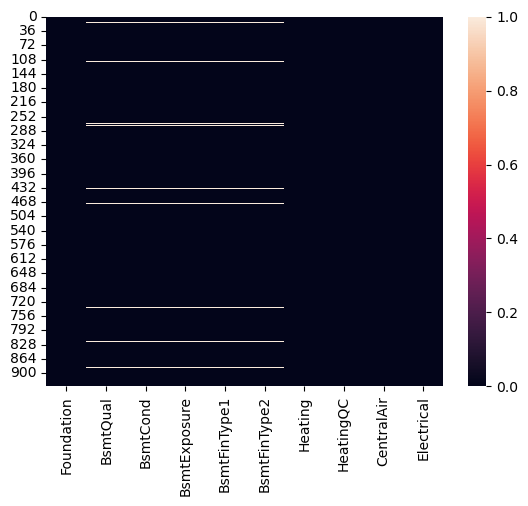

In [174]:
print(cat_feat.iloc[:,20:30].columns)
sns.heatmap(cat_feat.iloc[:,20:30].isnull())

In [175]:
sum(cat_feat['Electrical'].isna())

1

In [31]:
# Foundation        : ['PConc', 'CBlock', 'Slab', ..]               - encoding
# Heating           : ['GasA', 'GasW', 'Wall', ..]                  - merge into GasA and others & encoding
# HeatingQC         : ['Ex', 'TA', 'Gd', 'Fa', 'Po']                - label encoding
# CentralAir        : ['Y', 'N']                                    - label ecnoding
# Electrical        : ['SBrkr', 'FuseA', 'FuseF', nan, ']           - drop na(1), Fill with 'NO', merge? & encoding

In [176]:
print('Value counts in BsmtQual and other Bsmt features is', cat_feat['BsmtQual'].count(), '\nThe null percentage is', sum(cat_feat['BsmtQual'].isnull())/len(cat_feat))

Value counts in BsmtQual and other Bsmt features is 908 
The null percentage is 0.027837259100642397


In [177]:
cat_feat['BsmtExposure'].unique()

array(['Av', 'Mn', 'No', nan, 'Gd'], dtype=object)

<Axes: xlabel='BsmtExposure', ylabel='Count'>

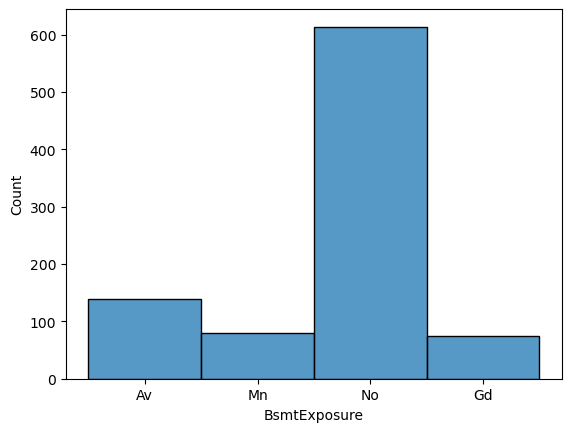

In [178]:
sns.histplot(cat_feat['BsmtExposure'])
# NO -> no exposure  -> encoded to NoExp  (1)
# null -> no bsmt    -> encoded to NoBsmt (0)
# Gd -> (4)

<Axes: xlabel='BsmtFinType1', ylabel='Count'>

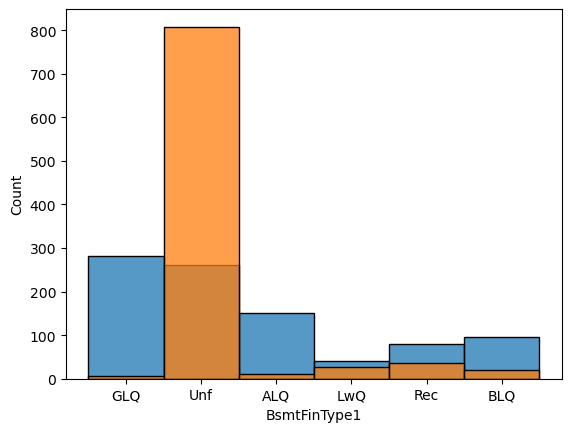

In [179]:
sns.histplot(cat_feat['BsmtFinType1'])
sns.histplot(cat_feat['BsmtFinType2'])

In [180]:
pd.DataFrame([cat_feat['BsmtFinType1'].value_counts(), cat_feat['BsmtFinType2'].value_counts()], index=['BsmtFinType1', 'BsmtFinType2'])

,GLQ,Unf,ALQ,BLQ,Rec,LwQ
BsmtFinType1,282,260,150,96,79,41
BsmtFinType2,7,808,10,19,36,27


In [181]:
sum(cat_feat['BsmtQual'].isnull())

26

In [182]:
cat_feat[(cat_feat['BsmtQual'].isnull()) &
         (cat_feat['BsmtCond'].isnull()) &
         (cat_feat['BsmtExposure'].isnull()) &
         (cat_feat['BsmtFinType1'].isnull()) &
         (cat_feat['BsmtFinType2'].isnull())].shape

# the same data

(26, 43)

Index(['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence'],
      dtype='object')


<Axes: >

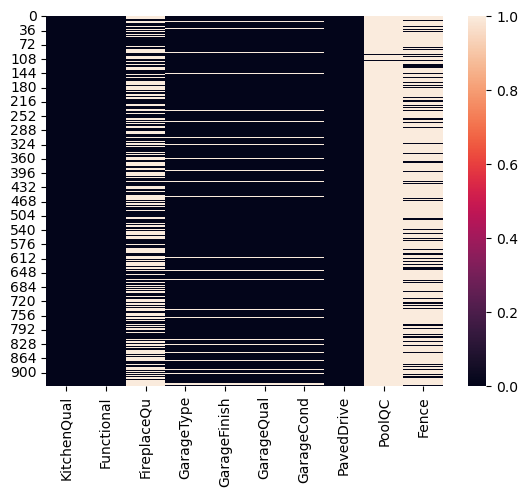

In [183]:
print(cat_feat.iloc[:,30:40].columns)
sns.heatmap(cat_feat.iloc[:,30:40].isnull())

In [40]:
# KitchenQual       : ['Gd', 'TA', 'Ex', 'Fa']                      - label encoding
# Functional        : ['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', ..]    - merege & label encoding
# PavedDrive        : ['Y', 'N', 'P']                               - label encoding

In [184]:
print('Value counts in Fence is', cat_feat['Fence'].count(), '\nThe null percentage is', sum(cat_feat['Fence'].isnull())/len(cat_feat))

Value counts in Fence is 179 
The null percentage is 0.8083511777301927


In [185]:
print('Value counts in PoolQC is', cat_feat['PoolQC'].count(), '\nThe null percentage is', sum(cat_feat['PoolQC'].isnull())/len(cat_feat))

Value counts in PoolQC is 3 
The null percentage is 0.9967880085653105


In [186]:
print('Value counts in GarageType and other Garage features is', cat_feat['GarageType'].count(), '\nThe null percentage is', sum(cat_feat['GarageType'].isnull())/len(cat_feat))

Value counts in GarageType and other Garage features is 884 
The null percentage is 0.05353319057815846


In [187]:
print('Value counts in FireplaceQu is', cat_feat['FireplaceQu'].count(), '\nThe null percentage is', sum(cat_feat['FireplaceQu'].isnull())/len(cat_feat))

Value counts in FireplaceQu is 498 
The null percentage is 0.4668094218415418


In [188]:
cat_feat[(cat_feat['GarageType'].isnull()) &
         (cat_feat['GarageFinish'].isnull()) &
         (cat_feat['GarageQual'].isnull()) &
         (cat_feat['GarageCond'].isnull())].shape

# the same data

(50, 43)

Index(['MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')


<Axes: >

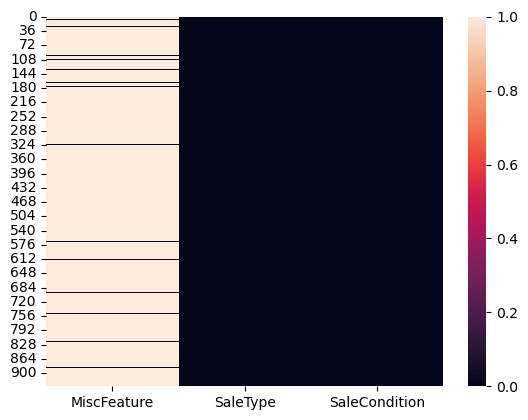

In [189]:
print(cat_feat.iloc[:,40:43].columns)
sns.heatmap(cat_feat.iloc[:,40:43].isnull())

In [47]:
# SaleType          : ['WD', 'New', 'Con', ..]                      - merge? & encoding
# SaleCondition     : ['Normal', 'Partial', 'Abnorml', ..]          - label? encoding

In [190]:
print('Value counts in MiscFeature is', cat_feat['MiscFeature'].count(), '\nThe null percentage is', sum(cat_feat['MiscFeature'].isnull())/len(cat_feat))

Value counts in MiscFeature is 36 
The null percentage is 0.961456102783726


In [191]:
cat_feat.iloc[:,:14].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle
count,934,934,56,934,934,934,934,934,934,934,934,934,934,934
unique,5,2,2,4,4,1,5,3,25,9,6,5,8,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable
freq,740,930,29,579,849,934,655,896,153,811,925,774,472,723


In [192]:
cat_feat.iloc[:,14:28].describe()

,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC
count,934,934,934,392,934,934,934,908,908,908,908,907,934,934
unique,6,13,14,3,4,5,6,4,4,4,6,6,6,5
top,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex
freq,921,357,348,303,573,818,423,418,842,614,282,808,913,493


In [193]:
cat_feat.iloc[:,28:43].describe()

,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,934,933,934,934,498,884,884,884,884,934,3,179,36,934,934
unique,2,4,4,6,5,6,3,4,5,3,2,4,3,9,6
top,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,874,856,462,881,230,572,370,848,855,866,2,91,32,815,774


### Numerical Features Analysis

In [194]:
nue_feat.shape

(934, 38)

In [53]:
# Null Columns:

# LotFrontage                               : 771,  0.17 is null    - Fill with the median/0
# MasVnrArea                                : 928,  0.006 is null   - Fill with 0
# GarageYrBlt                               : 884,  0.05 is null    - Fill with?

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'],
      dtype='object')


<Axes: >

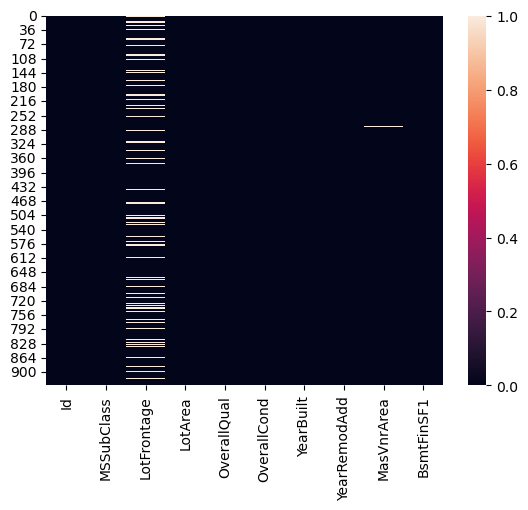

In [195]:
print(nue_feat.iloc[:,:10].columns)
sns.heatmap(nue_feat.iloc[:,:10].isnull())

In [55]:
# check outliers using box plot

# MSSubClass        : [20,125] [o>125]                              - outliers?
# LotArea           : [1300,20000] [o>20000]                        
# OverallQual       : [1,10]
# OverallCond       : [1,9]
# YearBuilt         : [1872, 2010]
# YearRemodAdd      : [1950, 2010]
# BsmtFinSF1        : [0, 1850] [o>1850]

In [196]:
print('Value counts in MasVnrArea is', nue_feat['MasVnrArea'].count(),'\nThe null percentage is', sum(nue_feat['MasVnrArea'].isnull())/len(nue_feat))

Value counts in MasVnrArea is 928 
The null percentage is 0.006423982869379015


<Axes: xlabel='MasVnrArea', ylabel='Count'>

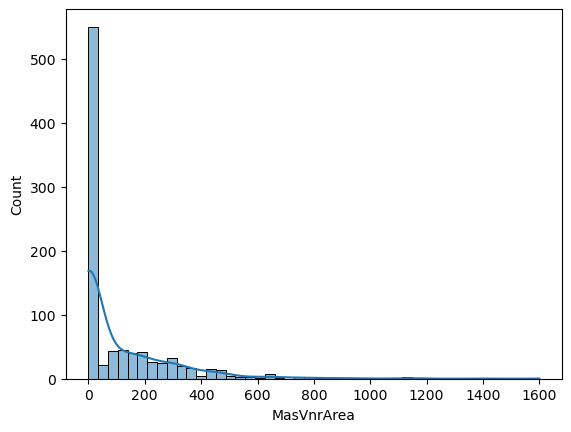

In [197]:
sns.histplot(nue_feat['MasVnrArea'], kde=True)

In [58]:
print('Value counts in LotFrontage is', nue_feat['LotFrontage'].count(),'\nThe null percentage is', sum(nue_feat['LotFrontage'].isnull())/len(nue_feat))

Value counts in LotFrontage is 771 
The null percentage is 0.1745182012847966


<Axes: xlabel='LotFrontage', ylabel='Count'>

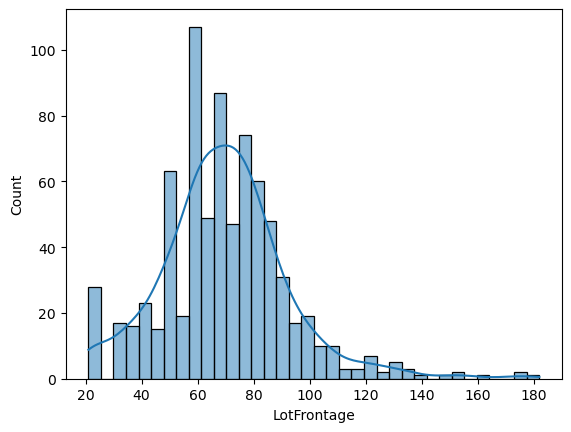

In [59]:
sns.histplot(nue_feat['LotFrontage'], kde=True)

Index(['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath'],
      dtype='object')


<Axes: >

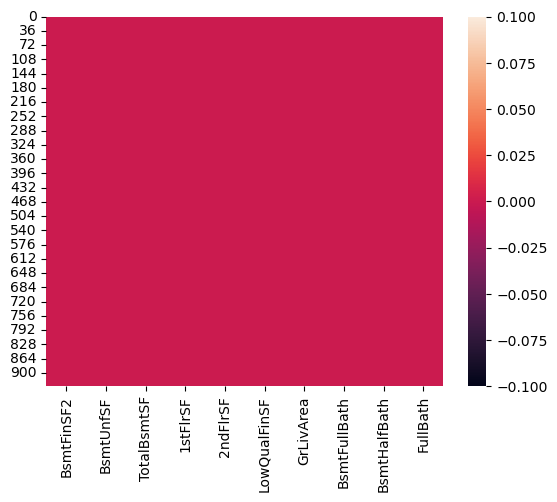

In [60]:
print(nue_feat.iloc[:,10:20].columns)
sns.heatmap(nue_feat.iloc[:,10:20].isnull())

In [61]:
# check outliers using box plot

# BsmtFinSF2        : [0] [o>=30]                                   - outliers?
# BsmtUnfSF         : [0, 2046]                                     - label? encoding
# TotalBsmtSF       : [0, 3206]
# 1stFlrSF          : [334, 3228]
# 2ndFlrSF          : [167, 2065] [100]                            - zeros count?
# LowQualFinSF      : [0, 360, 371, 514, 420, 120, 205,  53, 572,  80, 392, 528, 232, 513, 481]
# GrLivArea         : [334, 4676]
# BsmtFullBath      : [0, 1, 2]
# BsmtHalfBath      : [0, 1, 2]
# FullBath          : [2, 3, 1, 0]

<Axes: xlabel='1stFlrSF', ylabel='Count'>

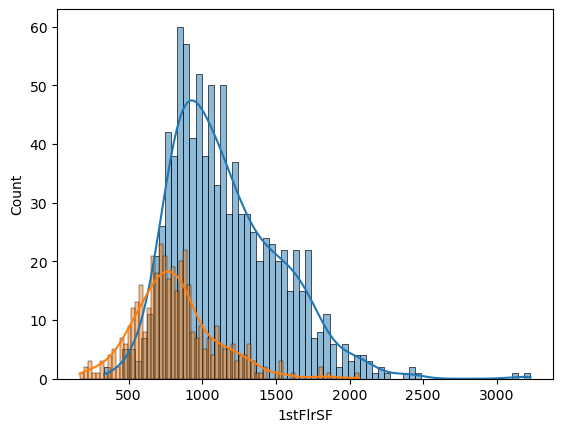

In [62]:
sns.histplot(nue_feat['1stFlrSF'], kde=True, bins= 70)
sns.histplot(nue_feat[nue_feat['2ndFlrSF']>0]['2ndFlrSF'], kde=True, bins= 70)

Index(['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF'],
      dtype='object')


<Axes: >

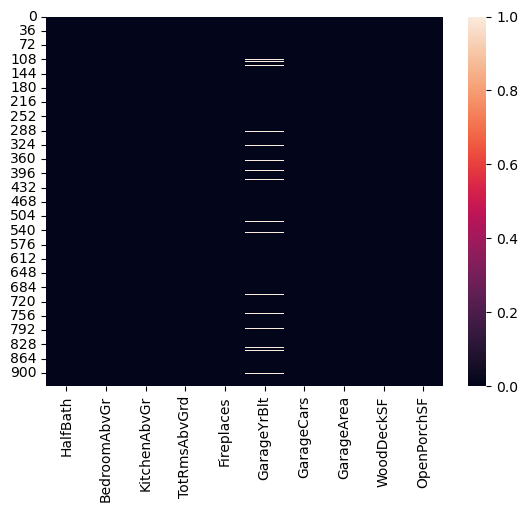

In [63]:
print(nue_feat.iloc[:,20:30].columns)
sns.heatmap(nue_feat.iloc[:,20:30].isnull())

In [64]:
# check outliers using box plot

# HalfBath          : [0, 1, 2]                          
# BedroomAbvGr      : [3, 4, 2, 1, 5, 0, 6]
# KitchenAbvGr      : [1, 2, 0, 3]
# TotRmsAbvGrd      : [ 7,  6, 11,  8,  5,  4,  9, 10,  3,  2, 12]
# Fireplaces        : [0, 1, 2, 3]
# GarageCars        : [2, 3, 1, 0, 4]
# GarageArea        : [0, 1390]
# WoodDeckSF        : [0, 440] [o>440]                              - outliers?
# OpenPorchSF       : [0, 200] [o>200]

In [65]:
nue_feat[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].corr()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
BsmtFullBath,1.000000,-0.145066,-0.083659,-0.040738
BsmtHalfBath,-0.145066,1.000000,-0.042711,-0.004509
FullBath,-0.083659,-0.042711,1.000000,0.102247
HalfBath,-0.040738,-0.004509,0.102247,1.000000


In [66]:
print('Value counts in GarageYrBlt is', nue_feat['GarageYrBlt'].count(),'\nThe null percentage is', sum(nue_feat['GarageYrBlt'].isnull())/len(nue_feat))

Value counts in GarageYrBlt is 884 
The null percentage is 0.05353319057815846


<Axes: xlabel='GarageYrBlt', ylabel='Count'>

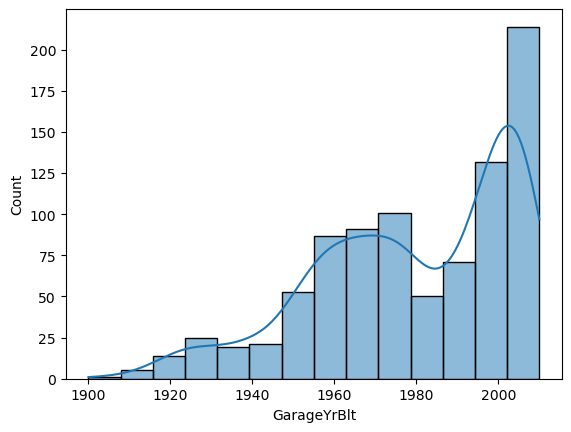

In [67]:
sns.histplot(nue_feat['GarageYrBlt'], kde=True)

Index(['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


<Axes: >

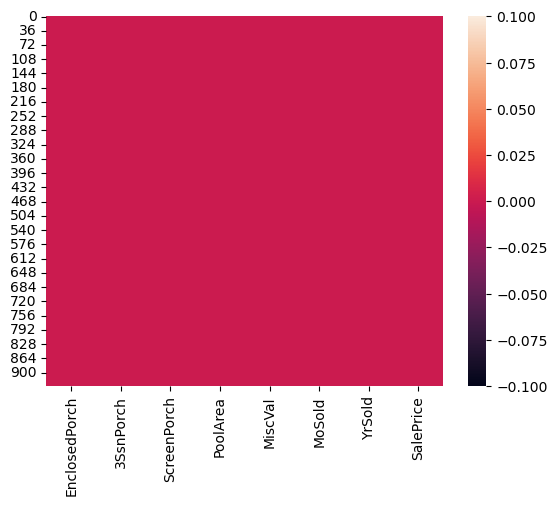

In [68]:
print(nue_feat.iloc[:,30:38].columns)
sns.heatmap(nue_feat.iloc[:,30:38].isnull())

In [69]:
# check outliers using box plot

# EnclosedPorch     : [19, 301] [0] [552]                        
# 3SsnPorch         : [238, 144, 168, 130,  96, 304, 216, 407, 508, 153, 245, 320] [0]
# ScreenPorch       : [53, 480] [0]
# PoolArea          : [0, 738, 555, 512]
# MiscVal           : [350, 15500] [0]
# MoSold            : [1,  12]
# YrSold            : [2006, 2010]
# SalePrice         : [34900, 755000]

<Axes: xlabel='3SsnPorch', ylabel='Count'>

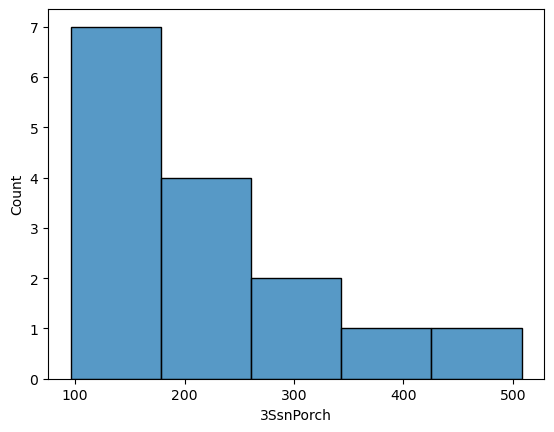

In [70]:
sns.histplot(nue_feat[nue_feat['3SsnPorch']>0]['3SsnPorch'])

In [71]:
nue_feat['SalePrice'].describe()

count       934.000000
mean     182981.457173
std       80613.726628
min       34900.000000
25%      132000.000000
50%      165075.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [72]:
nue_feat[['MoSold','YrSold']].corr()

,MoSold,YrSold
MoSold,1.000000,-0.146788
YrSold,-0.146788,1.000000


## Data Cleaning

### Split the Data

In [362]:
df1 = df.drop(['SalePrice','Id'], axis = 1)
y = df['SalePrice']
test1 = test.drop('Id', axis = 1)
test_id = test['Id']

In [363]:
df1_train, df1_validate, y_train, y_validate = train_test_split(df1, y, test_size=0.3)

In [364]:
df1_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
df1_validate.reset_index(drop = True, inplace = True)
y_validate.reset_index(drop = True, inplace = True)

In [365]:
df1_train.shape, df1_validate.shape, test1.shape

((653, 79), (281, 79), (234, 79))

### Fill Nulls - df1_train, df1_validate, test1: clean of null values

<Axes: xlabel='YearBuilt', ylabel='GarageYrBlt'>

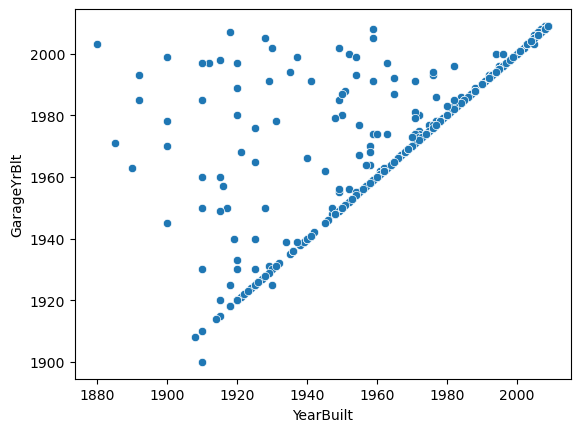

In [366]:
sns.scatterplot(y = df1_train['GarageYrBlt'], x = df1_train['YearBuilt'])

In [367]:
df1_train['GarageYrBlt'] = df1_train['GarageYrBlt'].fillna(df1_train['YearBuilt'])
df1_validate['GarageYrBlt'] = df1_validate['GarageYrBlt'].fillna(df1_validate['YearBuilt'])
test1['GarageYrBlt'] = test1['GarageYrBlt'].fillna(test1['YearBuilt'])

In [368]:
num_feat = []
for col in df1_train:
    if 'object' not in str(df1_train[col].dtype):
        num_feat.append(col)
median_values = df1_train.groupby('Neighborhood')[num_feat].median().to_dict()

In [369]:
def fill_nulls(df):
    s = df.isna().sum()
    missing_values = s[s >= 1]
    for col in missing_values.index:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('NO')
        else:
            df[col] = df.apply(
                lambda row: median_values[col][row['Neighborhood']] if pd.isnull(row[col]) else row[col], 
                axis=1
            )

In [370]:
fill_nulls(df1_train)
fill_nulls(df1_validate)
fill_nulls(test1)

In [371]:
df1_train.shape, df1_validate.shape, test1.shape

((653, 79), (281, 79), (234, 79))

### Fill Outliers - df2_train, df2_validate, test2: clean of outliers

In [372]:
df2_train = df1_train.copy()
df2_validate = df1_validate.copy()
test2 = test1.copy()

In [373]:
def col_outliers(column): 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()
outliers_counts = df1_train.select_dtypes(include=['int','float']).apply(col_outliers, axis = 0)
outliers_cols = outliers_counts[outliers_counts>=1].index

In [374]:
def handle_outliers_with_log(dataframe):
    dataframe[outliers_cols] = dataframe[outliers_cols].apply(np.log1p)

In [375]:
handle_outliers_with_log(df2_train), handle_outliers_with_log(df2_validate), handle_outliers_with_log(test2)

(None, None, None)

## Data PreProcessing

### Data Encoding - df3, test3: encoded data

In [410]:
df3_train = df2_train.copy()
df3_validate = df2_validate.copy()
test3 = test2.copy()

#### Label Encoding:

In [411]:
# ExterQual         : ['Gd', 'TA', 'Ex', 'Fa']                      - label encoding
# ExterCond         : ['TA', 'Gd', 'Fa', 'Po', 'Ex']                - label encoding
# HeatingQC         : ['Ex', 'TA', 'Gd', 'Fa', 'Po']                - label encoding
# KitchenQual       : ['Gd', 'TA', 'Ex', 'Fa']                      - label encoding
# LotShape          : ['Reg', 'IR1', 'IR2', 'IR3']                  - label encoding
# LandContour       : ['Lvl', 'Bnk', 'HLS', 'Low']                  - label encoding
# LandSlope         : ['Gtl', 'Sev', 'Mod']                         - label encoding - the same as LandContour
# CentralAir        : ['Y', 'N']                                    - label encoding
# Functional        : ['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', ..]    - merege & label encoding
# PavedDrive        : ['Y', 'N', 'P']                               - label encoding

# BsmtQual,BsmtCond,BsmtExposure,           : 908,  0.03 is null    - Fill with 'NO' & label encoding           ['Gd', 'Ex', 'TA', 'Fa'],['TA', 'Gd', 'Fa', 'Po'],['GLQ', 'Unf', 'ALQ', 'LwQ', 'no', 'Rec', 'BLQ'],
#                   BsmtFinType1&2                                                                           
# FireplaceQu                               : 498,  0.47 is null    - Fill with 'NO' & label encoding           ['TA', 'Gd', 'Fa', 'Po', 'Ex']
# GarageFinish,GarageQual,GarageCond        : 884,  0.05 is null    - Fill with 'NO' & label encoding           ['Fin', 'Unf', 'RFn'], ['TA', 'Fa', 'Ex', 'Gd'], ['TA', 'Ex', 'Fa', 'Gd', 'Po']
# PoolQC                                    : 3,    0.99 is null    - Drop, Fill     & hot(wood&privacy) & label encoding ['Gd', 'Ex']
# Fence                                     : 197,  0.8  is null    - Fill with 'NO' & label encoding           ['MnPrv', 'GdWo', 'GdPrv', 'MnWw']

In [412]:
label_encoding_features = ['ExterQual','ExterCond','HeatingQC','KitchenQual','LotShape',
                           'LandContour','LandSlope','CentralAir','Functional','PavedDrive','BsmtQual',
                           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageFinish',
                           'GarageQual','GarageCond','PoolQC','Fence']

In [413]:
my_label_encoding = {
    'NO':0,'N':0,'IR3':0,'Lvl':0,'Gtl':0,'Sal':0,
    'No':0.5,'P':0.5,'Unf':0.5,'LwQ':0.5,
    'Po':1,'Y':1,'IR2':1,'Bnk':1,'Mod':1,'Sev':1,'Mn':1,'Rec':1,'RFn':1,'MnWw':1,
    'Fa':2,'IR1':2,'HLS':2,'Sev':2,'Maj1':2,'Maj2':2,'Av':2,'BLQ':2,'Fin':2,'GdWo':2,
    'TA':3,'Reg':3,'Low':3,'Mod':3,'ALQ':3,'MnPrv':3,
    'Gd':4,'Min1':4,'Min2':4,'GLQ':4,'GdPrv':4,
    'Ex':5,'Typ':5
}


In [414]:
for col in df3_train[label_encoding_features]:
    df3_train[col] = df3_train[col].map(my_label_encoding)

In [415]:
for col in df3_validate[label_encoding_features]:
    df3_validate[col] = df3_validate[col].map(my_label_encoding)

In [416]:
for col in test3[label_encoding_features]:
    test3[col] = test3[col].map(my_label_encoding)

##### check correlation

In [417]:
df3_train['FireplaceQu'].isna().sum()

0

In [418]:
pd.concat([df3_train[label_encoding_features],y_train], axis=1)

,ExterQual,ExterCond,HeatingQC,KitchenQual,LotShape,LandContour,LandSlope,CentralAir,Functional,PavedDrive,...,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,SalePrice
0,3.0,3.0,5.0,3.0,3.0,0.0,0.0,1.0,5.0,1.0,...,0.5,4.0,0.5,0.0,2.0,3.0,3.0,0.0,0.0,165000
1,3.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,5.0,1.0,...,0.5,1.0,0.5,0.0,0.5,3.0,3.0,0.0,0.0,128500
2,4.0,3.0,5.0,4.0,3.0,0.0,0.0,1.0,5.0,1.0,...,0.5,4.0,0.5,4.0,2.0,3.0,3.0,0.0,0.0,254000
3,3.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,5.0,1.0,...,2.0,2.0,0.5,0.0,0.5,3.0,3.0,0.0,0.0,129000
4,3.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,5.0,1.0,...,0.5,2.0,0.5,0.0,0.5,3.0,3.0,0.0,0.0,135000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,4.0,3.0,5.0,4.0,3.0,0.0,0.0,1.0,5.0,1.0,...,4.0,4.0,0.5,3.0,1.0,3.0,3.0,0.0,0.0,424870
649,3.0,3.0,2.0,3.0,3.0,0.0,0.0,1.0,5.0,1.0,...,0.5,0.5,0.5,4.0,0.5,3.0,3.0,0.0,3.0,127500
650,4.0,3.0,5.0,4.0,3.0,0.0,0.0,1.0,5.0,1.0,...,2.0,0.5,0.5,4.0,1.0,3.0,3.0,0.0,0.0,317000
651,3.0,3.0,4.0,3.0,3.0,0.0,0.0,1.0,5.0,0.0,...,0.5,0.5,0.5,0.0,0.5,3.0,3.0,0.0,0.0,122500


In [419]:
corr = pd.concat([df3_train[label_encoding_features],y_train], axis=1).corr()

In [420]:
corr

,ExterQual,ExterCond,HeatingQC,KitchenQual,LotShape,LandContour,LandSlope,CentralAir,Functional,PavedDrive,...,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,SalePrice
ExterQual,1.000000,0.006846,0.516387,0.710725,-0.138449,-0.000569,-0.034003,0.197077,0.070144,0.214867,...,0.222065,0.306024,-0.011185,0.324349,0.476462,0.206040,0.194310,0.058834,-0.235473,0.657319
ExterCond,0.006846,1.000000,-0.005331,0.078334,-0.011493,-0.034002,-0.023600,0.053848,0.079218,0.059493,...,0.024470,0.073887,0.047917,0.000961,-0.006981,0.082633,0.095331,0.063868,0.120854,0.016111
HeatingQC,0.516387,-0.005331,1.000000,0.488968,-0.099686,-0.039692,-0.069270,0.306875,0.024431,0.092952,...,0.112555,0.173787,0.071971,0.169108,0.360670,0.167420,0.176113,0.019183,-0.159719,0.397171
KitchenQual,0.710725,0.078334,0.488968,1.000000,-0.142677,0.042274,-0.004441,0.267053,0.116035,0.182280,...,0.213465,0.303442,0.018433,0.323278,0.434639,0.243463,0.229704,0.086707,-0.128001,0.637882
LotShape,-0.138449,-0.011493,-0.099686,-0.142677,1.000000,-0.207794,-0.127001,-0.101482,-0.058005,-0.064159,...,-0.182735,-0.115864,-0.051485,-0.225243,-0.239087,-0.097038,-0.079433,-0.008029,0.036012,-0.260187
LandContour,-0.000569,-0.034002,-0.039692,0.042274,-0.207794,1.000000,0.580922,-0.014976,0.015094,-0.006208,...,0.253620,0.010142,0.047287,0.122187,-0.000336,0.006792,0.022093,-0.015498,-0.041698,0.077447
LandSlope,-0.034003,-0.023600,-0.069270,-0.004441,-0.127001,0.580922,1.000000,0.014013,0.008085,-0.009609,...,0.196572,0.008877,0.058279,0.047599,-0.040473,-0.032324,-0.033635,-0.010251,-0.038849,0.016292
CentralAir,0.197077,0.053848,0.306875,0.267053,-0.101482,-0.014976,0.014013,1.000000,0.071045,0.350160,...,0.119330,0.228220,0.078412,0.190232,0.243579,0.303037,0.317684,0.014898,0.036248,0.245492
Functional,0.070144,0.079218,0.024431,0.116035,-0.058005,0.015094,0.008085,0.071045,1.000000,0.065565,...,0.075042,0.169169,-0.146709,0.040630,0.062417,0.035019,0.036496,0.011813,-0.039839,0.096007
PavedDrive,0.214867,0.059493,0.092952,0.182280,-0.064159,-0.006208,-0.009609,0.350160,0.065565,1.000000,...,0.103555,0.206346,0.068032,0.118006,0.226707,0.352479,0.382886,0.014408,-0.065639,0.181879


In [421]:
df3_train[label_encoding_features].corr().min().min(), corr[corr<1].max().max()

(-0.23908748486164708, 0.9489651362825371)

<Axes: >

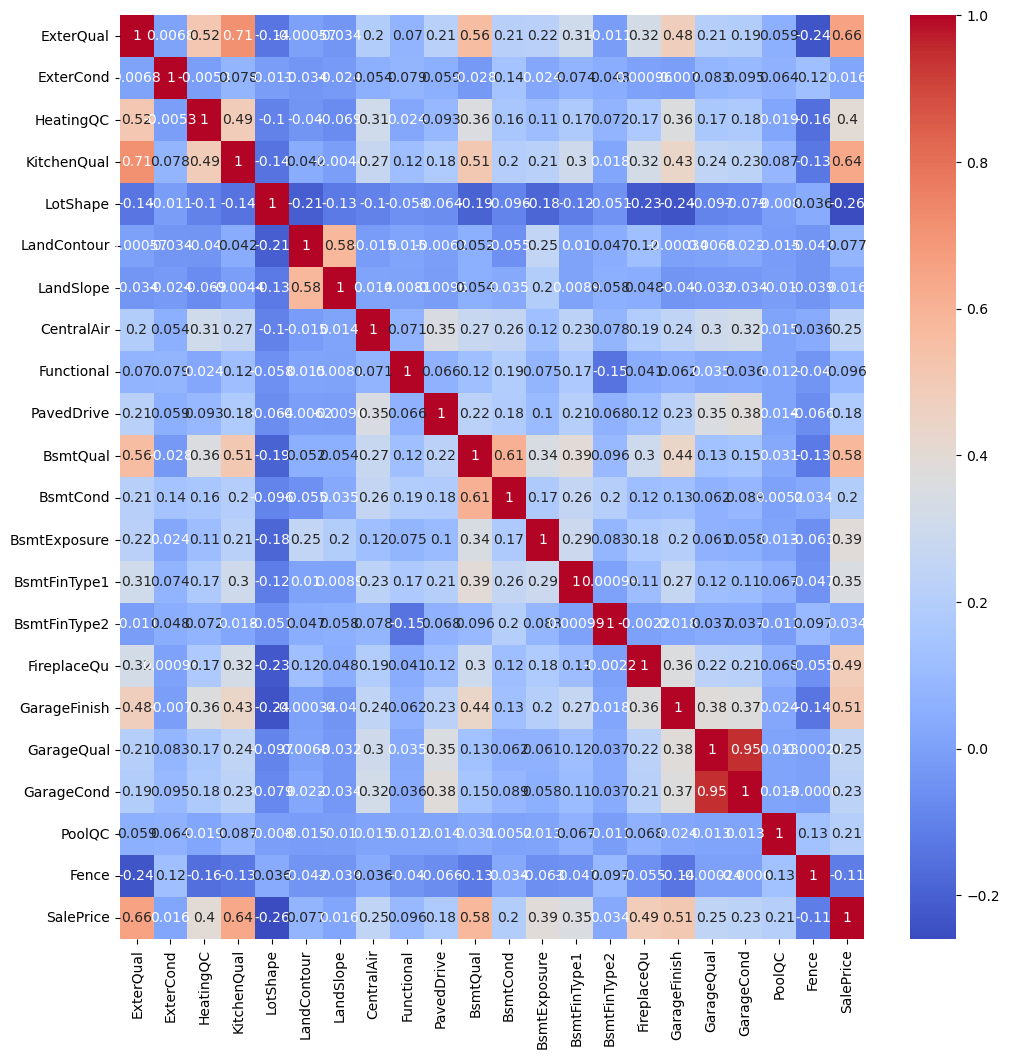

In [422]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap='coolwarm', annot=True)

#### One Hot Encoding

In [455]:
# MSZoning          : ['RL', 'FV', 'RM', 'RH', 'C (all)']           - merge (R) & encoding
# street            : ['Pave', 'Grvl']                              - encoding
# Utilities         : ['AllPub']                                    - drop
# LotConfig         : ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'] - encoding
# Neighborhood      : ['CollgCr', 'NWAmes', 'NridgHt', ..]          - encoding
# Condition1&2      : ['Norm', 'Feedr', 'RRNe', 'PosN', ..]         - encoding
# BldgType          : ['1Fam', 'Twnhs', 'TwnhsE', 'Duplex', ..]     - encoding
# HouseStyle        : ['Pave', 'Grvl']                              - merge? & encoding
# RoofStyle         : ['Gable', 'Hip', 'Gambrel', 'Flat', ..]       - encoding
# RoofMatl          : ['CompShg', 'Tar&Grv', 'Membran', ..]         - CompShg & others, encoding
# Exterior1st&2nd   : ['VinylSd', 'HdBoard', 'MetalSd', ..]         - merge? & encoding?
# Foundation        : ['PConc', 'CBlock', 'Slab', ..]               - encoding
# Heating           : ['GasA', 'GasW', 'Wall', ..]                  - merge into GasA and others & encoding
# Electrical        : ['SBrkr', 'FuseA', 'FuseF', nan, ']           - drop na(1), Fill with 'NO', merge? & encoding
# SaleType          : ['WD', 'New', 'Con', ..]                      - merge? & encoding
# SaleCondition     : ['Normal', 'Partial', 'Abnorml', ..]          - encoding

In [456]:
train_hot_encoding_features = df3_train.select_dtypes(include=[object])
validate_hot_encoding_features = df3_validate.select_dtypes(include=[object])
test_hot_encoding_features = test3.select_dtypes(include=[object])

In [457]:
df3_train.drop(train_hot_encoding_features.columns, axis = 1, inplace = True)
df3_validate.drop(validate_hot_encoding_features.columns, axis = 1, inplace = True)
test3.drop(train_hot_encoding_features.columns, axis = 1, inplace = True)

In [458]:
print(train_hot_encoding_features.shape, df3_train.shape)
print(validate_hot_encoding_features.shape, df3_validate.shape)
print(test_hot_encoding_features.shape, test3.shape)

(653, 0) (653, 210)
(281, 0) (281, 210)
(234, 0) (234, 210)


In [459]:
# Fit the encoder on the training data
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
onehot_encoder.fit(train_hot_encoding_features)

# Transform the training and test data
df3_encoded = onehot_encoder.transform(train_hot_encoding_features)
validate3_encoded = onehot_encoder.transform(validate_hot_encoding_features)
test3_encoded = onehot_encoder.transform(test_hot_encoding_features)

# Convert to DataFrame for better visualization
df3_encoded = pd.DataFrame(df3_encoded, columns=onehot_encoder.get_feature_names_out(train_hot_encoding_features.columns))
validate3_encoded = pd.DataFrame(validate3_encoded, columns=onehot_encoder.get_feature_names_out(validate_hot_encoding_features.columns))
test3_encoded = pd.DataFrame(test3_encoded, columns=onehot_encoder.get_feature_names_out(test_hot_encoding_features.columns))

In [460]:
print(train_hot_encoding_features.shape, df3_train.shape)
print(validate_hot_encoding_features.shape, df3_validate.shape)
print(test_hot_encoding_features.shape, test3.shape)

(653, 0) (653, 210)
(281, 0) (281, 210)
(234, 0) (234, 210)


In [461]:
df3_train = pd.concat([df3_train, df3_encoded], axis = 1)
df3_validate = pd.concat([df3_validate, validate3_encoded], axis = 1)
test3 = pd.concat([test3, test3_encoded], axis = 1)

In [462]:
df3_train.shape, df3_validate.shape, test3.shape

((653, 210), (281, 210), (234, 210))

##### check correlation

In [463]:
def calculate_targetCorr(cols,target):
    corr_dict = {}
    for col in cols:
        corr = np.abs(pd.concat([cols[col],target], axis = 1).corr().iloc[0,1])
        if corr<0.1:
            corr_dict[col] = corr
    return corr_dict

In [464]:
target_corr = calculate_targetCorr(df3_train, y_train)

In [465]:
len(target_corr)

114

In [466]:
independent_cols = []
for item in target_corr.keys():
    independent_cols.append(item)

<Axes: >

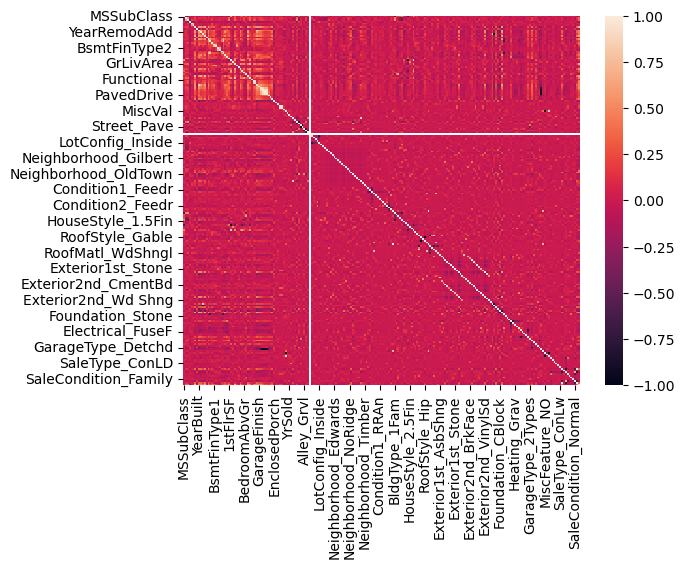

In [467]:
sns.heatmap(pd.concat((df3_train,y_train), axis = 1).corr())

In [468]:
# df3_train = df3_train.drop(independent_cols, axis = 1)
# df3_validate = df3_validate.drop(independent_cols, axis = 1)
# test3 = test3.drop(independent_cols, axis = 1)

In [469]:
def calculate_corr(cor_values):
    corr_dict = {}
    for i in range(len(cor_values)):
        for j in range(i+1,len(cor_values)):
            if cor_values.iloc[i,j] > 0.7:
                corr_dict[cor_values.index[i],cor_values.index[j]] = cor_values.iloc[i,j]
    return corr_dict

In [470]:
train_corr = calculate_corr(df3_train.corr())
validate_corr = calculate_corr(df3_validate.corr())
test_corr = calculate_corr(test3.corr())

In [471]:
len(train_corr)

33

In [472]:
first_cols = []
second_cols = []
for item in train_corr.keys():
    first_cols.append(item[0])
    second_cols.append(item[1])

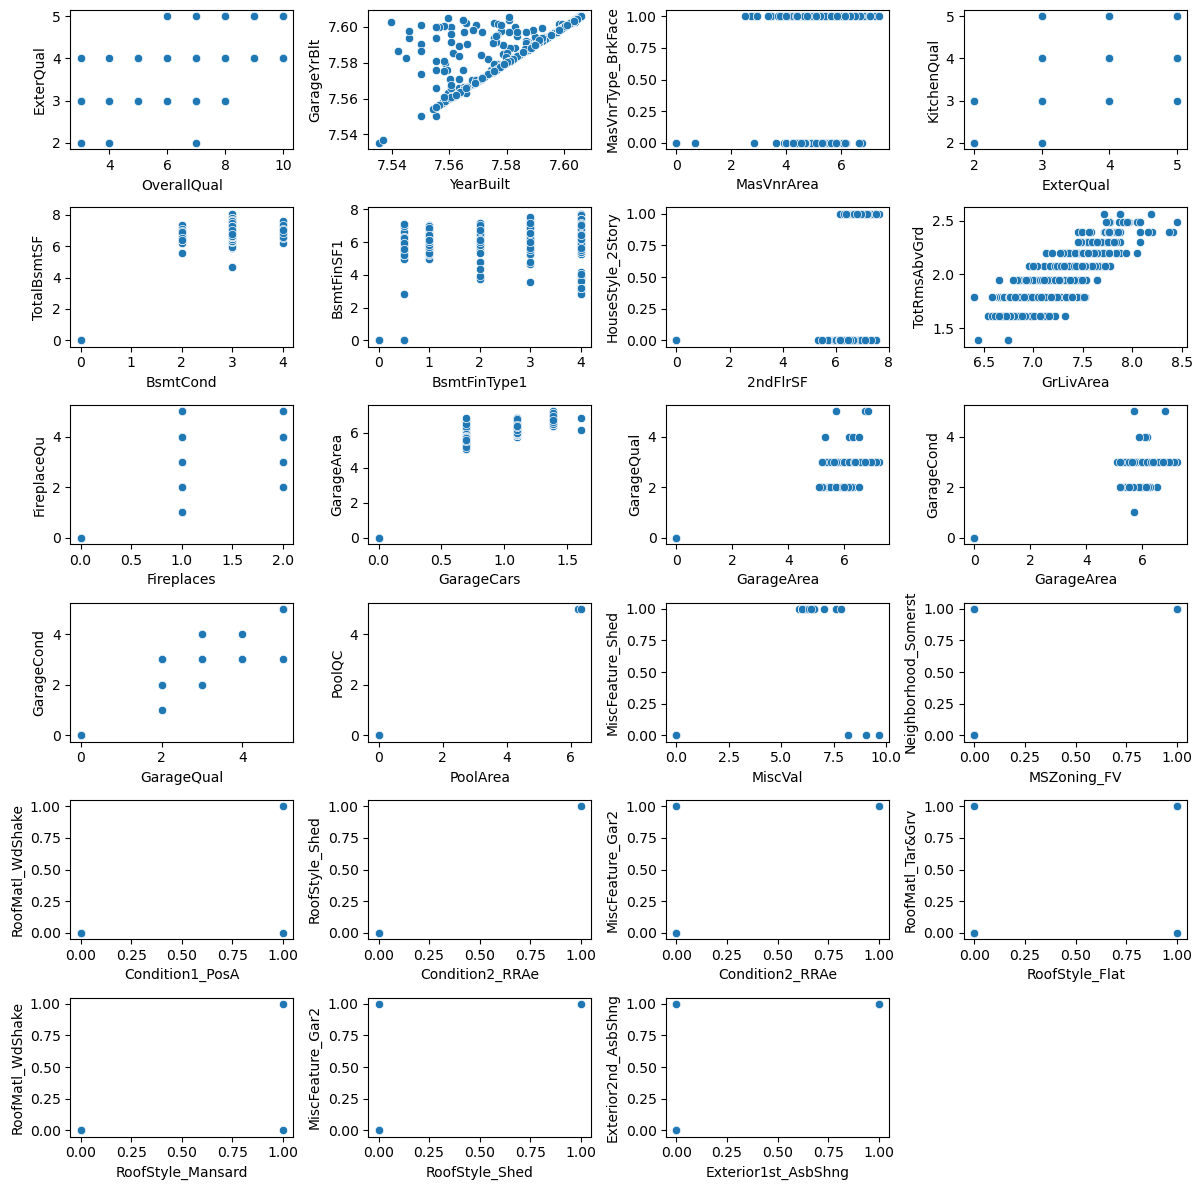

In [473]:
plt.figure(figsize=(12,12))
for i in range(23):
    plt.subplot(6,4,i+1)
    sns.scatterplot(x = df3_train[first_cols[i]], y = df3_train[second_cols[i]])
plt.tight_layout()

In [474]:
first_cols = []
second_cols = []
for item in validate_corr.keys():
    first_cols.append(item[0])
    second_cols.append(item[1])

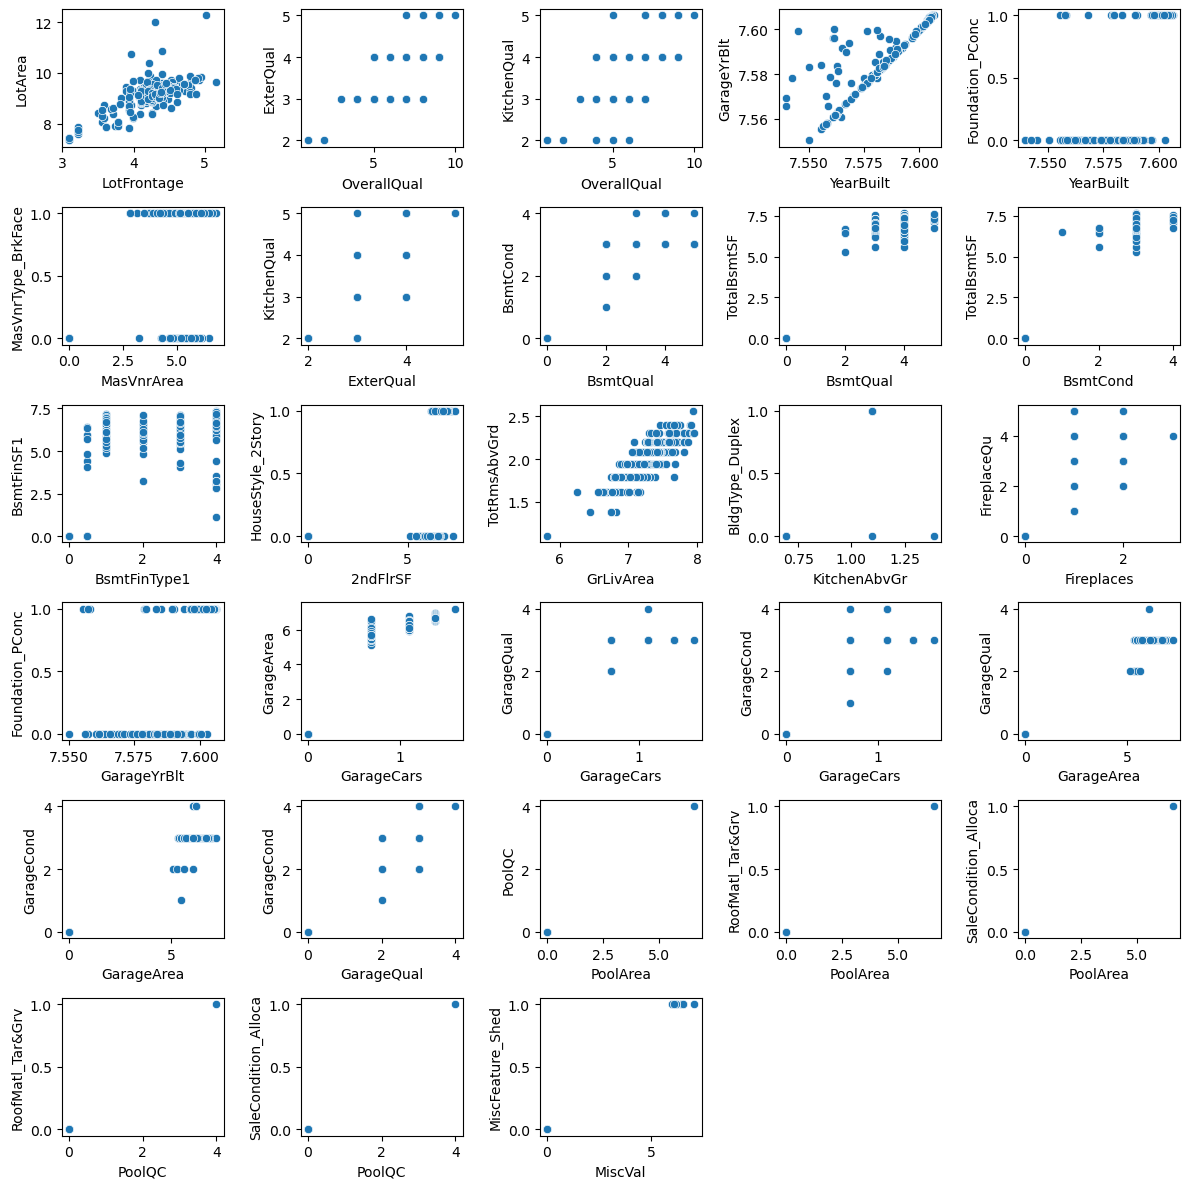

In [475]:
plt.figure(figsize=(12,12))
for i in range(28):
    plt.subplot(6,5,i+1)
    sns.scatterplot(x = df3_validate[first_cols[i]], y = df3_validate[second_cols[i]])
plt.tight_layout()

In [476]:
first_cols = []
second_cols = []
for item in test_corr.keys():
    first_cols.append(item[0])
    second_cols.append(item[1])

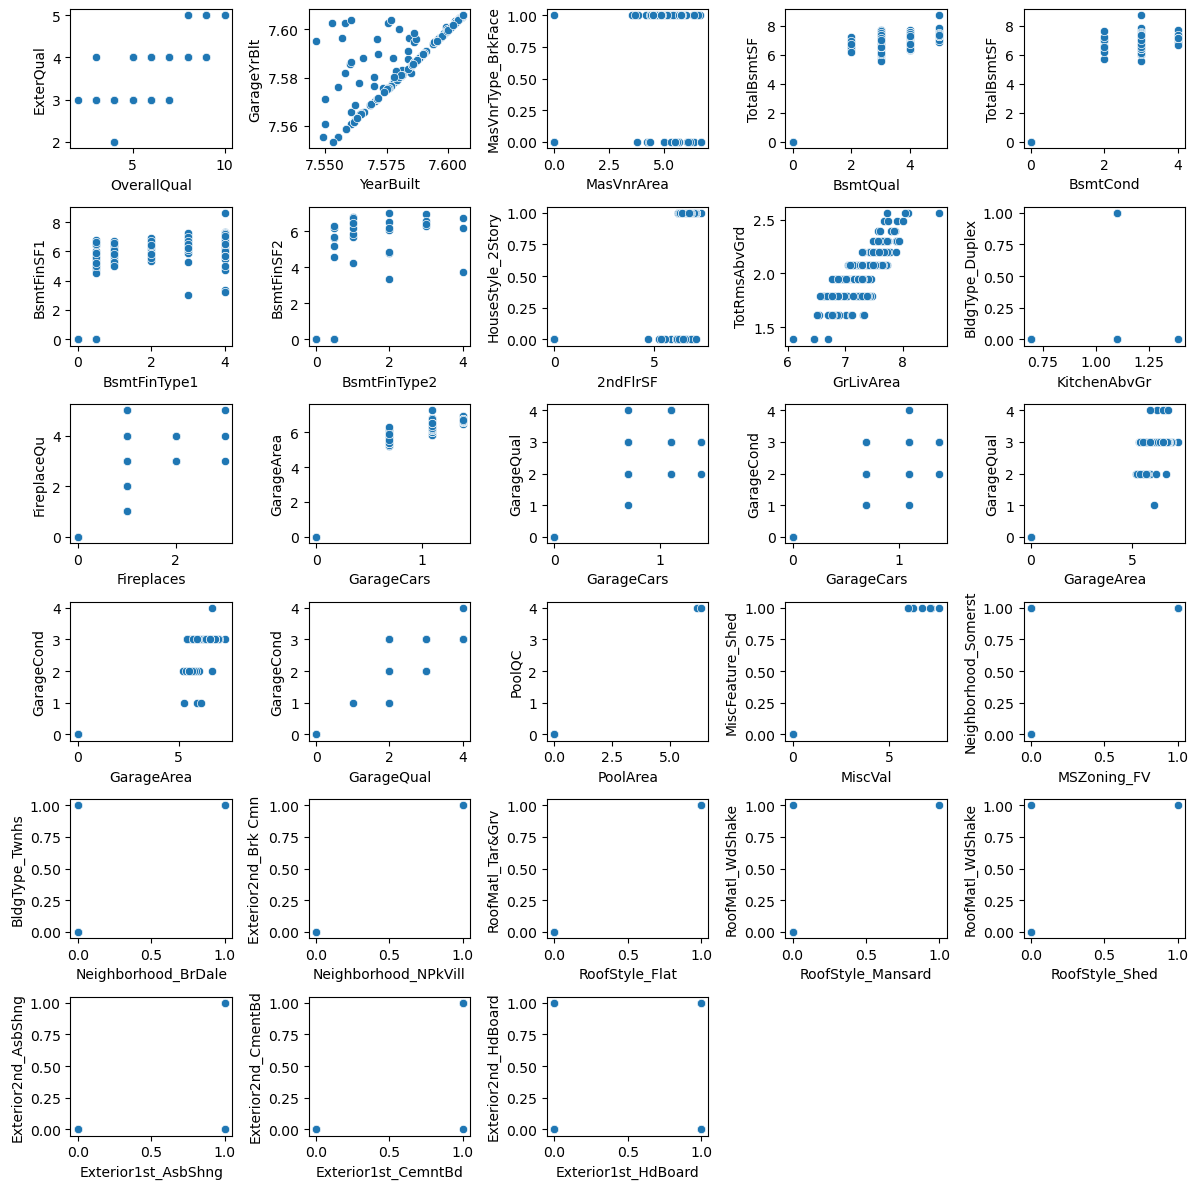

In [477]:
plt.figure(figsize=(12,12))
for i in range(28):
    plt.subplot(6,5,i+1)
    sns.scatterplot(x = test3[first_cols[i]], y = test3[second_cols[i]])
plt.tight_layout()

In [478]:
train_corr

{('OverallQual', 'ExterQual'): 0.7136944315701734,
 ('YearBuilt', 'GarageYrBlt'): 0.8371845835628229,
 ('MasVnrArea', 'MasVnrType_BrkFace'): 0.8092474871936597,
 ('ExterQual', 'KitchenQual'): 0.7107252141643915,
 ('BsmtCond', 'TotalBsmtSF'): 0.813243669032272,
 ('BsmtFinType1', 'BsmtFinSF1'): 0.7401386822484776,
 ('2ndFlrSF', 'HouseStyle_2Story'): 0.8182181270969257,
 ('GrLivArea', 'TotRmsAbvGrd'): 0.822409173920088,
 ('Fireplaces', 'FireplaceQu'): 0.8747362455973131,
 ('GarageCars', 'GarageArea'): 0.8514323796948893,
 ('GarageArea', 'GarageQual'): 0.9218610190300169,
 ('GarageArea', 'GarageCond'): 0.9281983914989569,
 ('GarageQual', 'GarageCond'): 0.9489651362825371,
 ('PoolArea', 'PoolQC'): 0.9999794056741269,
 ('MiscVal', 'MiscFeature_Shed'): 0.8820614774547044,
 ('MSZoning_FV', 'Neighborhood_Somerst'): 0.8480210993520375,
 ('Condition1_PosA', 'RoofMatl_WdShake'): 0.7065643133037185,
 ('Condition2_RRAe', 'RoofStyle_Shed'): 1.0,
 ('Condition2_RRAe', 'MiscFeature_Gar2'): 0.70656431330

In [479]:
test3[['2ndFlrSF','GrLivArea']].corr()

,2ndFlrSF,GrLivArea
2ndFlrSF,1.000000,0.553123
GrLivArea,0.553123,1.000000


In [483]:
''''OverallQual' 'ExterQual'
'GarageArea' 'GarageCars'
'GrLivArea' 'TotRmsAbvGrd'
'GrLivArea' '1stFlrSF'
'TotalBsmtSF' '1stFlrSF'
'''

print(train_corr['OverallQual','ExterQual'])
print(train_corr['GarageCars','GarageArea'])
print(train_corr['GrLivArea','TotRmsAbvGrd'])

0.7136944315701734
0.8514323796948893
0.822409173920088


In [484]:
print((pd.concat([df3_train['OverallQual'],y_train], axis = 1)).corr().iloc[0,1])
print((pd.concat([df3_train['ExterQual'],y_train], axis = 1)).corr().iloc[0,1])
print((pd.concat([df3_train['GarageCars'],y_train], axis = 1)).corr().iloc[0,1])
print((pd.concat([df3_train['GarageArea'],y_train], axis = 1)).corr().iloc[0,1])
print((pd.concat([df3_train['GrLivArea'],y_train], axis = 1)).corr().iloc[0,1])
print((pd.concat([df3_train['TotRmsAbvGrd'],y_train], axis = 1)).corr().iloc[0,1])
print((pd.concat([df3_train['2ndFlrSF'],y_train], axis = 1)).corr().iloc[0,1])
print((pd.concat([df3_train['1stFlrSF'],y_train], axis = 1)).corr().iloc[0,1])
print((pd.concat([df3_train['TotalBsmtSF'],y_train], axis = 1)).corr().iloc[0,1])

0.7770117595024739
0.6573186370501105
0.5395394777277764
0.35266231830294703
0.6851013055602689
0.48261791109831026
0.1611958721449568
0.5879816998209386
0.3168631327916486


## Scaling

In [485]:
df3_train

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.795791,4.219508,8.412055,3.0,0.0,0.0,6,1.791759,7.600902,1999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.931826,4.110874,9.422140,2.0,0.0,0.0,5,1.945910,7.571474,1950,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.795791,3.891820,8.738896,3.0,0.0,0.0,8,1.791759,7.604396,2006,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.044522,4.234107,9.166597,3.0,0.0,0.0,5,1.945910,7.579168,1956,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.044522,4.290459,9.225525,3.0,0.0,0.0,5,1.791759,7.579168,1956,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,4.110874,4.356709,9.206935,3.0,0.0,0.0,8,1.791759,7.604396,2007,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
649,3.044522,4.304065,9.195836,3.0,0.0,0.0,6,1.791759,7.579168,1956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
650,4.110874,4.343805,9.168685,3.0,0.0,0.0,8,1.791759,7.603399,2005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
651,5.252273,4.110874,9.336180,3.0,0.0,0.0,4,1.945910,7.542213,1950,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [490]:
# Separate the target variable and features
X_train = df3_train
X_validate = df3_validate
X_test = test3

In [495]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
scaled_X = scaler.fit_transform(X_train)
scaled_validate = scaler.transform(X_validate)
scaled_test = scaler.transform(X_test)

In [499]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_preds = rf_regressor.predict(X_validate)
rf_mae = mean_absolute_error(y_validate, rf_preds)
rf_mse = mean_squared_error(y_validate, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_validate, rf_preds))
rf_r2 = r2_score(y_validate, rf_preds)
rsq=np.sqrt(rf_mse)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_preds = gb_regressor.predict(X_validate)
gb_mae = mean_absolute_error(y_validate, gb_preds)
gb_mse = mean_squared_error(y_validate, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(y_validate, gb_preds))
gb_r2 = r2_score(y_validate, gb_preds)
rsqg=np.sqrt(gb_mse)

# Support Vector Regressor
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
svr_preds = svr_regressor.predict(X_validate)
svr_mae = mean_absolute_error(y_validate, svr_preds)
svr_mse = mean_squared_error(y_validate, svr_preds)
svr_rmse = np.sqrt(mean_squared_error(y_validate, svr_preds))
svr_r2 = r2_score(y_validate, svr_preds)

# Neural Network Regressor
nn_regressor = MLPRegressor()
nn_regressor.fit(X_train, y_train)
nn_preds = nn_regressor.predict(X_validate)
nn_mae = mean_absolute_error(y_validate, nn_preds)
nn_mse = mean_squared_error(y_validate, nn_preds)
nn_rmse = np.sqrt(mean_squared_error(y_validate, nn_preds))
nn_r2 = r2_score(y_validate, nn_preds)

# K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
knn_preds = knn_regressor.predict(X_validate)
knn_mae = mean_absolute_error(y_validate, knn_preds)
knn_mse = mean_squared_error(y_validate, knn_preds)
knn_rmse = np.sqrt(mean_squared_error(y_validate, knn_preds))
knn_r2 = r2_score(y_validate, knn_preds)

# Print the results
print("Random Forest Regressor:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R-squared:", rf_r2)
print("\nGradient Boosting Regressor:")
print("MAE:", gb_mae)
print("MSE:", gb_mse)
print("RMSE:", gb_rmse)
print("R-squared:", gb_r2)
print("\nSupport Vector Regressor:")
print("MAE:", svr_mae)
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)
print("R-squared:", svr_r2)
print("\nNeural Network Regressor:")
print("MAE:", nn_mae)
print("MSE:", nn_mse)
print("RMSE:", nn_rmse)
print("R-squared:", nn_r2)
print("\nK-Nearest Neighbors Regressor:")
print("MAE:", knn_mae)
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)
print("R-squared:", knn_r2)
print(rsq)
print(rsqg)

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Regressor:
MAE: 18152.187758007116
MSE: 708905976.4260569
RMSE: 26625.288288130458
R-squared: 0.8764642192285734

Gradient Boosting Regressor:
MAE: 16736.521891212786
MSE: 590856472.8754746
RMSE: 24307.53942453811
R-squared: 0.8970358296758746

Support Vector Regressor:
MAE: 56708.71866224266
MSE: 6071228860.517379
RMSE: 77918.09071401441
R-squared: -0.05798797367631425

Neural Network Regressor:
MAE: 56120.12134104453
MSE: 6075977646.205427
RMSE: 77948.55769163037
R-squared: -0.05881550929767654

K-Nearest Neighbors Regressor:
MAE: 31010.12953736654
MSE: 1995852226.7917438
RMSE: 44674.96196743478
R-squared: 0.6521976519592426
26625.288288130458
24307.53942453811


In [637]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

pred1 = model.predict(X_validate)
predictions = model.predict(X_test)
print(r2_score(pred1,y_validate))
print(np.sqrt(mean_squared_error(pred1,y_validate)))

0.7949438318581864
28347.14891793247
Predictions saved to predictions.csv


In [500]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

pred1 = model.predict(X_validate)
predictions = model.predict(X_test)
print(r2_score(pred1, y_validate))
print(np.sqrt(mean_squared_error(pred1, y_validate)))

results = pd.DataFrame({'Id': test_id, 'SalePrice': predictions})
results.to_csv("C:\\Users\\shath\\Downloads\\Book1.csv", index=False)
print("Predictions saved to Book1.csv")

0.8754255287512088
24618.57064880437
Predictions saved to Book1.csv


In [639]:
results.shape

(234, 2)